In [1]:
import os
import re
import seaborn as sb
import tensorflow
import pandas as pd
import numpy
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,4.8
import math
from sklearn.preprocessing import MinMaxScaler
#15, 6
import matplotlib.pyplot as plt
import time
#import statsmodels
#from statsmodels.tsa.stattools import adfuller
#import statsmodels.api as sm
import scipy
from sklearn.externals import joblib
from sklearn import preprocessing
from sklearn import metrics
import keras
from keras.models import Sequential
from keras.regularizers import l1, l2
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import Adam, SGD
import keras.callbacks as callbacks
from keras.utils import np_utils
from keras.models import load_model
from keras import backend as K

Using TensorFlow backend.


In [2]:
crossval = pd.read_csv('/home/webadmin/crossval_an.csv')

In [76]:
dirout = '/home/webadmin/plots/'

In [6]:
crossval

,Neurons,OperationPoint,Pd,Std Pd,SP,Std SP,Fa,Std Fa
0,100,Onine LH Medium Pd,90.31,0.03,94.35,0.11,1.52,0.25
1,100,Onine LH Medium SP,97.77,0.13,96.94,0.16,3.90,0.26
2,100,Onine LH Medium Pf,69.10,6.89,83.52,3.78,0.58,0.02
3,100,References,90.45,NaN,83.49,NaN,0.41,NaN
4,95,Onine LH Medium Pd,90.35,0.06,94.38,0.12,1.50,0.25
5,95,Onine LH Medium SP,97.48,0.31,96.90,0.14,3.68,0.50
6,95,Onine LH Medium Pf,68.97,7.30,83.44,4.02,0.58,0.01
7,95,References,90.45,NaN,83.72,NaN,0.41,NaN
8,90,Onine LH Medium Pd,90.34,0.06,94.34,0.15,1.56,0.28
9,90,Onine LH Medium SP,97.46,0.15,96.95,0.17,3.55,0.38


In [19]:
np_pd = crossval.loc[crossval['OperationPoint'] == 'Onine LH Medium Pd'].values
np_sp = crossval.loc[crossval['OperationPoint'] == 'Onine LH Medium SP'].values
np_pf = crossval.loc[crossval['OperationPoint'] == 'Onine LH Medium Pf'].values
np_ref = crossval.loc[crossval['OperationPoint'] == 'References'].values

In [23]:
neurons

array([100, 95, 90, 85, 80, 70, 60, 50, 40, 30, 20, 10], dtype=object)

In [31]:
def two_scales(ax1, time, data1, data2, c1, c2):
    """

    Parameters
    ----------
    ax : axis
        Axis to put two scales on

    time : array-like
        x-axis values for both datasets

    data1: array-like
        Data for left hand scale

    data2 : array-like
        Data for right hand scale

    c1 : color
        Color for line 1

    c2 : color
        Color for line 2

    Returns
    -------
    ax : axis
        Original axis
    ax2 : axis
        New twin axis
    """
    ax2 = ax1.twinx()

    ax1.plot(time, data1, color=c1)
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('exp')

    ax2.plot(time, data2, color=c2)
    ax2.set_ylabel('sin')
    return ax1, ax2


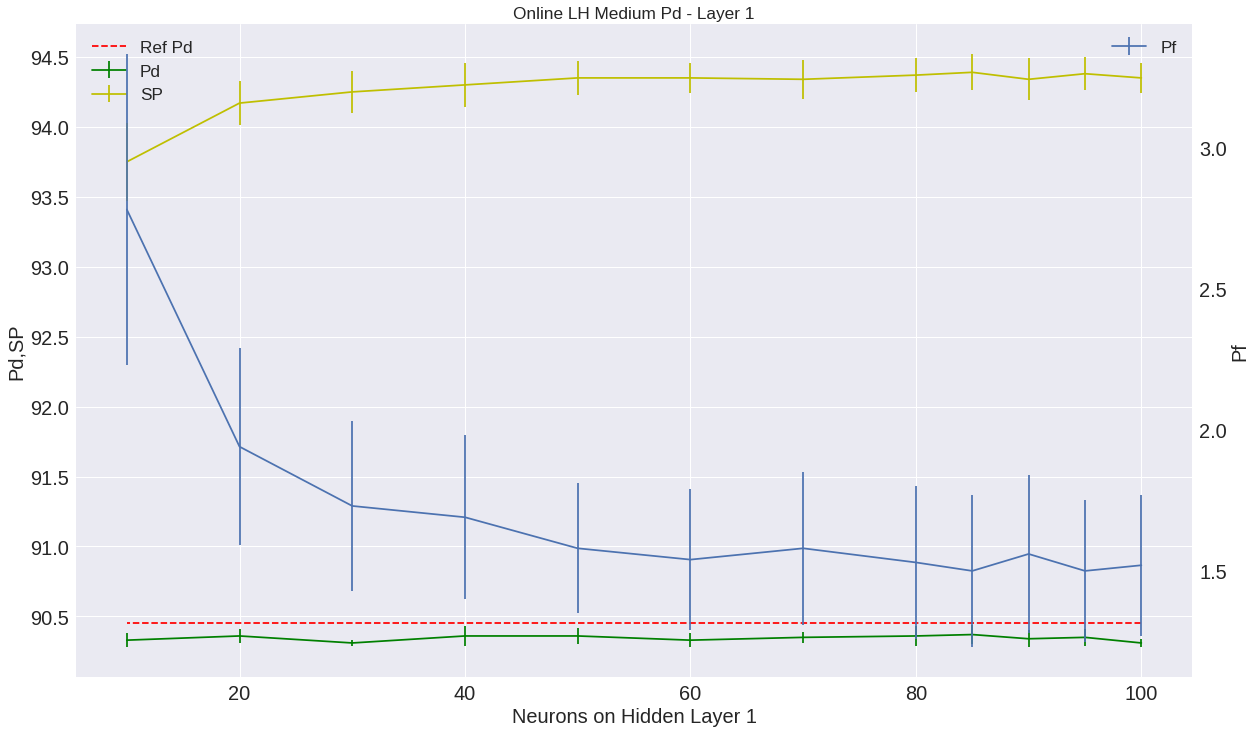

In [80]:
#mlp.axes.Axes.errorbar()
neurons = np_pd[:,0]
pd = np_pd[:,2]
stdpd = np_pd[:,3]
sp = np_pd[:,4]
stdsp = np_pd[:,5]
pf = np_pd[:,6]
stdpf = np_pd[:,7]

ref_pd = np_ref[:,2]
ref_sp = np_ref[:,4]
ref_pf = np_ref[:,6]

fig, ax1 = plt.subplots(figsize=(20, 12))
#fig = plt.figure(figsize=(20, 12))
ax2 = ax1.twinx()
ax1.errorbar(neurons, y=pd, yerr=stdpd,color='g')
ax1.errorbar(neurons, y=sp, yerr=stdsp,color='y')
#ax1.set_xlabel('time (s)')
#ax1.set_ylabel('exp')
ax2.errorbar(neurons, y=pf, yerr=stdpf)
#ax2.set_ylabel('sin')

#plt.errorbar(neurons, y=pd, yerr=stdpd)
#plt.errorbar(neurons, y=sp, yerr=stdsp)
#plt.errorbar(neurons, y=pf, yerr=stdpf)
#plt.errorbar(neurons, y=pd, yerr=stdpd,fmt='o', markersize=8,ecolor='Green')
plt.title('Online LH Medium Pd - Layer 1',fontsize= 'xx-large')
ax1.set_ylabel('Pd,SP',fontsize=20)
ax2.set_ylabel('Pf',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
ax2.tick_params(axis='both',labelsize=20)
ax1.plot(neurons,ref_pd,'r--')
ax1.legend(['Ref Pd','Pd','SP'], loc='best',fontsize = 'xx-large')
ax2.legend(['Pf'], loc='best',fontsize = 'xx-large')
axes = plt.gca()
ylim = axes.get_ylim()

import matplotlib.ticker as ticker
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
fig.savefig(dirout+'pd.png')

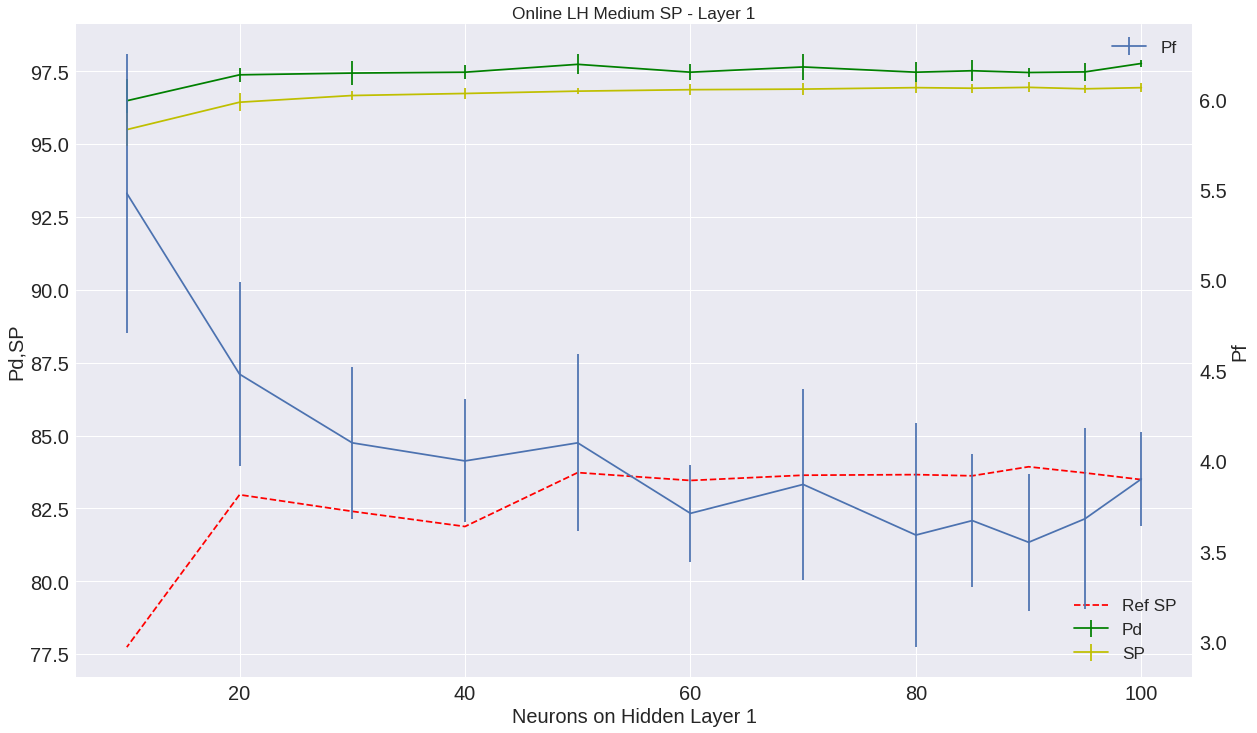

In [81]:
#mlp.axes.Axes.errorbar()
neurons = np_sp[:,0]
pd = np_sp[:,2]
stdpd = np_sp[:,3]
sp = np_sp[:,4]
stdsp = np_sp[:,5]
pf = np_sp[:,6]
stdpf = np_sp[:,7]

ref_pd = np_ref[:,2]
ref_sp = np_ref[:,4]
ref_pf = np_ref[:,6]

fig, ax1 = plt.subplots(figsize=(20, 12))
#fig = plt.figure(figsize=(20, 12))
ax2 = ax1.twinx()
ax1.errorbar(neurons, y=pd, yerr=stdpd,color='g')
ax1.errorbar(neurons, y=sp, yerr=stdsp,color='y')
#ax1.set_xlabel('time (s)')
#ax1.set_ylabel('exp')
ax2.errorbar(neurons, y=pf, yerr=stdpf)
#ax2.set_ylabel('sin')

#plt.errorbar(neurons, y=pd, yerr=stdpd)
#plt.errorbar(neurons, y=sp, yerr=stdsp)
#plt.errorbar(neurons, y=pf, yerr=stdpf)
#plt.errorbar(neurons, y=pd, yerr=stdpd,fmt='o', markersize=8,ecolor='Green')
plt.title('Online LH Medium SP - Layer 1',fontsize= 'xx-large')
ax1.set_ylabel('Pd,SP',fontsize=20)
ax2.set_ylabel('Pf',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
ax2.tick_params(axis='both',labelsize=20)
ax1.plot(neurons,ref_sp,'r--')
ax1.legend(['Ref SP','Pd','SP'], loc='best',fontsize = 'xx-large')
ax2.legend(['Pf'], loc='best',fontsize = 'xx-large')
axes = plt.gca()
ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
fig.savefig(dirout+'sp.png')

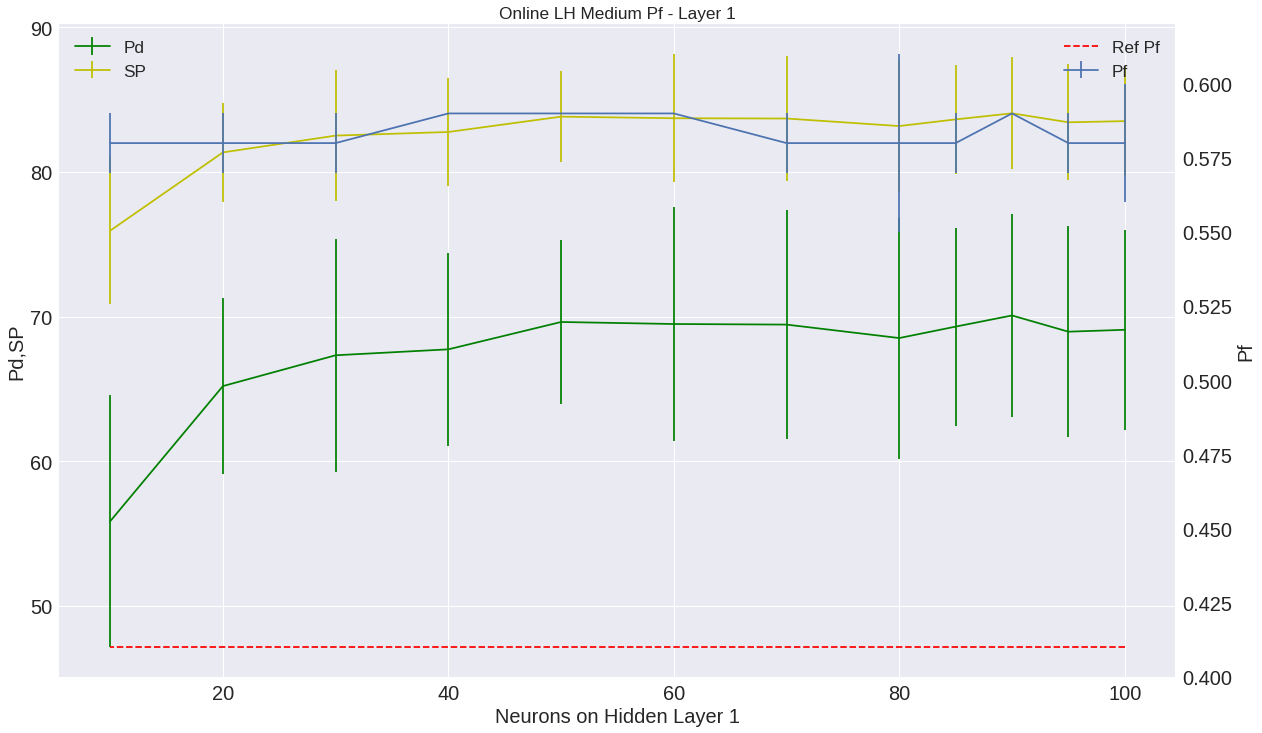

In [82]:
#mlp.axes.Axes.errorbar()
neurons = np_pf[:,0]
pd = np_pf[:,2]
stdpd = np_pf[:,3]
sp = np_pf[:,4]
stdsp = np_pf[:,5]
pf = np_pf[:,6]
stdpf = np_pf[:,7]

ref_pd = np_ref[:,2]
ref_sp = np_ref[:,4]
ref_pf = np_ref[:,6]

fig, ax1 = plt.subplots(figsize=(20, 12))
#fig = plt.figure(figsize=(20, 12))
ax2 = ax1.twinx()
ax1.errorbar(neurons, y=pd, yerr=stdpd,color='g')
ax1.errorbar(neurons, y=sp, yerr=stdsp,color='y')
#ax1.set_xlabel('time (s)')
#ax1.set_ylabel('exp')
ax2.errorbar(neurons, y=pf, yerr=stdpf)
#ax2.set_ylabel('sin')

#plt.errorbar(neurons, y=pd, yerr=stdpd)
#plt.errorbar(neurons, y=sp, yerr=stdsp)
#plt.errorbar(neurons, y=pf, yerr=stdpf)
#plt.errorbar(neurons, y=pd, yerr=stdpd,fmt='o', markersize=8,ecolor='Green')
plt.title('Online LH Medium Pf - Layer 1',fontsize= 'xx-large')
ax1.set_ylabel('Pd,SP',fontsize=20)
ax2.set_ylabel('Pf',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
ax2.tick_params(axis='both',labelsize=20)
ax2.plot(neurons,ref_pf,'r--')
ax1.legend(['Pd','SP'], loc=2,fontsize = 'xx-large')
ax2.legend(['Ref Pf','Pf'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
fig.savefig(dirout+'pf.png')